In [1]:
using Compose
using Color

In [9]:
include("ExtractGoddamnedPositions01.jl")

limpiaarraystring (generic function with 1 method)

In [11]:
Coincidencias=readdlm("Coincidencias01.dat");

In [14]:
PuntosGDyCA=map(ExtractGoddamnedPositions01, Coincidencias[:,1]);
ValoresLinea=map(limpiaarraystring, Coincidencias[:,2]);

In [258]:
lineas=Any[]
GDxs=Int[]
GDys=Int[]
CAxs=Int[]
CAys=Int[]

tantos=0
for a =1:length(PuntosGDyCA)
    MuestraGDCA=PuntosGDyCA[a]
    MuestraLinea=ValoresLinea[a]
    GDx=MuestraGDCA[1][1]
    GDy=MuestraGDCA[1][2]
    CAx=MuestraGDCA[2][1]
    CAy=MuestraGDCA[2][2]
    Peso=MuestraLinea[1]/min(MuestraLinea[2],MuestraLinea[3])
    if(Peso>0.0001)
        push!(GDxs,GDx)
        push!(GDys,GDy)
        push!(CAxs,CAx)
        push!(CAys,CAy) 
        push!(lineas, 
        (context(), 
        line([(GDx,GDy),(CAx,CAy)]), linewidth(Peso*2), 
        stroke(RGB(2*Peso, 0.00,0.00)
        )))
        tantos+=1
    end
end

In [259]:
tantos

2423

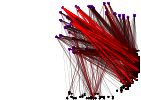

In [262]:
objeto=compose(context(units=UnitBox(0,0,65,65)), lineas...,  (context(),circle(GDxs, GDys, [0.5]), 
fill(RGB(0.4,0.0,0.76))), (context(), circle(CAxs, CAys, [0.4])))

In [263]:
draw(SVG("ConexionesPseudoCausales01.svg", 20cm,20cm), objeto)